In [1]:
import numpy as np
import pandas as pd
import os, json
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_info = pd.read_csv('data/superhero_info.csv')
df_info.head()

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}"
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}"


In [3]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Hero|Publisher  463 non-null    object
 1   Gender          463 non-null    object
 2   Race            463 non-null    object
 3   Alignment       463 non-null    object
 4   Hair color      463 non-null    object
 5   Eye color       463 non-null    object
 6   Skin color      463 non-null    object
 7   Measurements    463 non-null    object
dtypes: object(8)
memory usage: 29.1+ KB


In [4]:
df_info.duplicated().sum()

0

In [5]:
df_info.isna().sum()

Hero|Publisher    0
Gender            0
Race              0
Alignment         0
Hair color        0
Eye color         0
Skin color        0
Measurements      0
dtype: int64

In [6]:
#exploring existing format with a few examples
df_info['Measurements'].head(2)

0    {'Height': '203.0 cm', 'Weight': '441.0 kg'}
1     {'Height': '191.0 cm', 'Weight': '65.0 kg'}
Name: Measurements, dtype: object

In [7]:
#examining single value from measurements column
measure = df_info.loc[0,'Measurements']
print(type(measure))
measure

<class 'str'>


"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"

In [8]:
measure=measure.replace("'",'"')
measure

'{"Height": "203.0 cm", "Weight": "441.0 kg"}'

In [9]:
fixed_measure = json.loads(measure)
print(type(fixed_measure))
fixed_measure

<class 'dict'>


{'Height': '203.0 cm', 'Weight': '441.0 kg'}

In [10]:
#use .str.replace to replace all single quotes
df_info['Measurements'] = df_info['Measurements'].str.replace("'", '"')
#Apply the json.loads to the full column
df_info['Measurements'] = df_info['Measurements'].apply(json.loads)
df_info['Measurements'].head()

0    {'Height': '203.0 cm', 'Weight': '441.0 kg'}
1     {'Height': '191.0 cm', 'Weight': '65.0 kg'}
2     {'Height': '185.0 cm', 'Weight': '90.0 kg'}
3    {'Height': '203.0 cm', 'Weight': '441.0 kg'}
4    {'Height': '193.0 cm', 'Weight': '122.0 kg'}
Name: Measurements, dtype: object

In [11]:
#test single value
test_measure = df_info.loc[0, 'Measurements']
print(type(test_measure))
test_measure

<class 'dict'>


{'Height': '203.0 cm', 'Weight': '441.0 kg'}

In [12]:
height_weight = df_info['Measurements'].apply(pd.Series)
height_weight

,Height,Weight
0,203.0 cm,441.0 kg
1,191.0 cm,65.0 kg
2,185.0 cm,90.0 kg
3,203.0 cm,441.0 kg
4,193.0 cm,122.0 kg
...,...,...
458,183.0 cm,83.0 kg
459,165.0 cm,52.0 kg
460,66.0 cm,17.0 kg
461,170.0 cm,57.0 kg


In [13]:
df_info = pd.concat((df_info, height_weight), axis=1)
df_info.head(2)

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Height,Weight
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",203.0 cm,441.0 kg
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",191.0 cm,65.0 kg


In [14]:
df_info = df_info.drop(columns=['Measurements'])

In [15]:
to_replace = ['cm', '']
for char in to_replace:
    df_info['Height']=df_info['Height'].str.replace(char, '', regex=False)
df_info['Height']

0      203.0 
1      191.0 
2      185.0 
3      203.0 
4      193.0 
        ...  
458    183.0 
459    165.0 
460     66.0 
461    170.0 
462    185.0 
Name: Height, Length: 463, dtype: object

In [16]:
df_info['Height'] = df_info['Height'].astype(float)
df_info['Height']

0      203.0
1      191.0
2      185.0
3      203.0
4      193.0
       ...  
458    183.0
459    165.0
460     66.0
461    170.0
462    185.0
Name: Height, Length: 463, dtype: float64

In [17]:
to_replace = ['kg', '']
for char in to_replace:
    df_info['Weight']=df_info['Weight'].str.replace(char, '', regex=False)
df_info['Weight']

0      441.0 
1       65.0 
2       90.0 
3      441.0 
4      122.0 
        ...  
458     83.0 
459     52.0 
460     17.0 
461     57.0 
462     81.0 
Name: Weight, Length: 463, dtype: object

In [18]:
df_info['Weight'] = df_info['Weight'].astype(float)
df_info['Weight']

0      441.0
1       65.0
2       90.0
3      441.0
4      122.0
       ...  
458     83.0
459     52.0
460     17.0
461     57.0
462     81.0
Name: Weight, Length: 463, dtype: float64

In [19]:
df_info['Hero|Publisher'].head(2)

0            A-Bomb|Marvel Comics
1    Abe Sapien|Dark Horse Comics
Name: Hero|Publisher, dtype: object

In [20]:
df_info['Hero|Publisher'].str.split('|', expand=True)

,0,1
0,A-Bomb,Marvel Comics
1,Abe Sapien,Dark Horse Comics
2,Abin Sur,DC Comics
3,Abomination,Marvel Comics
4,Absorbing Man,Marvel Comics
...,...,...
458,Yellowjacket,Marvel Comics
459,Yellowjacket II,Marvel Comics
460,Yoda,George Lucas
461,Zatanna,DC Comics


In [21]:
df_info[['Hero', 'Publisher']] = df_info['Hero|Publisher'].str.split('|', expand=True)
df_info.head(2)

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Height,Weight,Hero,Publisher
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,203.0,441.0,A-Bomb,Marvel Comics
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,191.0,65.0,Abe Sapien,Dark Horse Comics


In [22]:
df_info = df_info.drop(columns=['Hero|Publisher'])
df_info.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Height,Weight,Hero,Publisher
0,Male,Human,good,No Hair,yellow,Unknown,203.0,441.0,A-Bomb,Marvel Comics
1,Male,Icthyo Sapien,good,No Hair,blue,blue,191.0,65.0,Abe Sapien,Dark Horse Comics


In [23]:
df_powers = pd.read_csv('data/superhero_powers.csv')
df_powers.head()

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."


In [24]:
df_powers['Powers'].value_counts()

Intelligence                                                                                                                                                                                                                                                         8
Durability,Super Strength                                                                                                                                                                                                                                            5
Agility,Stealth,Marksmanship,Weapons Master,Stamina                                                                                                                                                                                                                  4
Marksmanship                                                                                                                                                                                                       

In [25]:
df_powers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hero_names  667 non-null    object
 1   Powers      667 non-null    object
dtypes: object(2)
memory usage: 10.5+ KB


In [26]:
df_powers.duplicated().sum()

0

In [27]:
## examining a single value from the powers col
df_powers.loc[2,'Powers']

'Agility,Accelerated Healing,Cold Resistance,Durability,Underwater breathing,Marksmanship,Weapons Master,Longevity,Intelligence,Super Strength,Telepathy,Stamina,Immortality,Reflexes,Enhanced Sight,Sub-Mariner'

In [28]:
df_powers['Powers_split']=df_powers['Powers'].str.split(",")
df_powers['Powers_split'].head()

0      [Agility, Super Strength, Stamina, Super Speed]
1    [Accelerated Healing, Durability, Longevity, S...
2    [Agility, Accelerated Healing, Cold Resistance...
3                                 [Lantern Power Ring]
4    [Accelerated Healing, Intelligence, Super Stre...
Name: Powers_split, dtype: object

In [29]:
exploded = df_powers.explode('Powers_split')
exploded['Powers_split'].head()

0                Agility
0         Super Strength
0                Stamina
0            Super Speed
1    Accelerated Healing
Name: Powers_split, dtype: object

In [30]:
cols_to_make = exploded['Powers_split'].dropna().unique()
cols_to_make

array(['Agility', 'Super Strength', 'Stamina', 'Super Speed',
       'Accelerated Healing', 'Durability', 'Longevity', 'Camouflage',
       'Self-Sustenance', 'Cold Resistance', 'Underwater breathing',
       'Marksmanship', 'Weapons Master', 'Intelligence', 'Telepathy',
       'Immortality', 'Reflexes', 'Enhanced Sight', 'Sub-Mariner',
       'Lantern Power Ring', 'Invulnerability', 'Animation',
       'Super Breath', 'Dimensional Awareness', 'Flight', 'Size Changing',
       'Teleportation', 'Magic', 'Dimensional Travel',
       'Molecular Manipulation', 'Energy Manipulation', 'Power Cosmic',
       'Energy Absorption', 'Elemental Transmogrification',
       'Fire Resistance', 'Natural Armor', 'Heat Resistance',
       'Matter Absorption', 'Regeneration', 'Stealth', 'Power Suit',
       'Energy Blasts', 'Energy Beams', 'Heat Generation', 'Danger Sense',
       'Phasing', 'Force Fields', 'Hypnokinesis', 'Invisibility',
       'Enhanced Senses', 'Jump', 'Shapeshifting', 'Elasticity',
 

In [31]:
for col in cols_to_make:
    df_powers[col]=df_powers['Powers_split'].str.contains(col)
df_powers.head()

/var/folders/22/svy002cs5096tz6v89whk5580000gn/T/ipykernel_24240/3568319616.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_powers[col]=df_powers['Powers_split'].str.contains(col)
/var/folders/22/svy002cs5096tz6v89whk5580000gn/T/ipykernel_24240/3568319616.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_powers[col]=df_powers['Powers_split'].str.contains(col)
/var/folders/22/svy002cs5096tz6v89whk5580000gn/T/ipykernel_24240/3568319616.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

,hero_names,Powers,Powers_split,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du...","[Agility, Accelerated Healing, Cold Resistance...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abin Sur,Lantern Power Ring,[Lantern Power Ring],NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt...","[Accelerated Healing, Intelligence, Super Stre...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df_powers=df_powers.drop(columns=['Powers', 'Powers_split'])


In [33]:
left_df = df_info
right_df = df_powers
merged_df = pd.merge(left_df, right_df, left_on='Hero', right_on='hero_names')
merged_df.head(3)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Height,Weight,Hero,Publisher,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,Male,Human,good,No Hair,yellow,Unknown,203.0,441.0,A-Bomb,Marvel Comics,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Male,Icthyo Sapien,good,No Hair,blue,blue,191.0,65.0,Abe Sapien,Dark Horse Comics,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Male,Ungaran,good,No Hair,blue,red,185.0,90.0,Abin Sur,DC Comics,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
merged_df.groupby('Publisher')['Height'].mean()

Publisher
DC Comics            181.923913
Dark Horse Comics    176.909091
George Lucas         159.600000
Image Comics         211.000000
Marvel Comics        191.546128
Shueisha             171.500000
Star Trek            181.500000
Team Epic TV         180.750000
Unknown              178.000000
Name: Height, dtype: float64

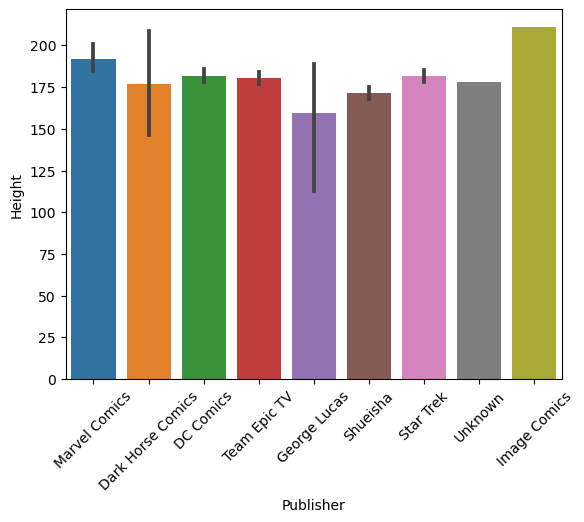

In [35]:
# Using seaborn to plot the group means
ax = sns.barplot(data=merged_df, x='Publisher', y="Height")
plt.xticks(rotation=45);

In [37]:
merged_df['Thirstokinesis'].info()

<class 'pandas.core.series.Series'>
Int64Index: 463 entries, 0 to 462
Series name: Thirstokinesis
Non-Null Count  Dtype  
--------------  -----  
0 non-null      float64
dtypes: float64(1)
memory usage: 7.2 KB
